In [18]:
import ase.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

from nebterpolator import traj_processor
import networkx as nx

import womblepy

In [2]:
e0_byhand = {'H': -12.336810713133827,
             'C': -145.60813964301911,
             'O': -429.04802314923108}

def makefig():
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(10)
    return fig, fig.add_subplot()

In [3]:
frames = ase.io.read("traj.xyz", ":")  # this is every 4th frame, so we have 1fs interval
len(frames)

126

# visualise the changes in the original trajectory

In [4]:
interest = traj_processor.get_connectivity_change(frames)
interest

[[27, 28], [30, 31]]

In [5]:
# chemical symbols and colors for the graphs
chemical_symbols = frames[0].get_chemical_symbols()
colors = {"H":"tab:blue", "C":"tab:gray", "O":"tab:red"}
node_colros = [colors[s] for s in chemical_symbols]

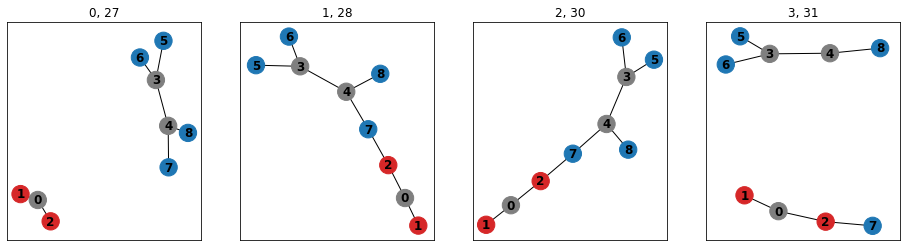

In [6]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)
gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

flat_interest = np.array(interest).flat[:]
for i in range(4):
    ax = fig.add_subplot(gs[i])
    nx.draw(traj_processor.atoms_to_graph(frames[flat_interest[i]]), with_labels=True, font_weight='bold', node_color=node_colros, ax=ax)
    ax.set_title("{}, {}".format(i, flat_interest[i]))
    ax.axis("on")

# smoothien the trajectory in multiple ways

In [12]:
# %%capture
# traj_processor.smooth_traj("traj.xyz", "traj_window7.xyz", smoothing_width=7)
# traj_processor.smooth_traj("traj.xyz", "traj_window11.xyz", smoothing_width=11)
# traj_processor.smooth_traj("traj.xyz", "traj_window21.xyz", smoothing_width=21)
# traj_processor.smooth_traj("traj.xyz", "traj_window31.xyz", smoothing_width=31)
# traj_processor.smooth_traj("traj.xyz", "traj_window41.xyz", smoothing_width=41)
# traj_processor.smooth_traj("traj.xyz", "traj_window61.xyz", smoothing_width=61)

In [13]:
# for i in [7, 11, 21, 31, 41, 61]:
#     print("! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window{i}.xyz gap_window{i}.xyz".format(i=i)) 

In [14]:
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window7.xyz gap_window7.xyz
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window11.xyz gap_window11.xyz
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window21.xyz gap_window21.xyz
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window31.xyz gap_window31.xyz
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window41.xyz gap_window41.xyz
# ! /home/tks32/work/oxidation_gap/womblepy/scripts/run_quip.sh traj_window61.xyz gap_window61.xyz

# potential and optimisations

In [17]:
from quippy.potential import Potential
from ase.optimize.fire import FIRE
gap_path = "/home/tks32/work/oxidation_gap/fitting_iterations/iter_7.0_collide/gap_model/GAP.xml"
pot = Potential("", param_filename=gap_path)

In [33]:
def opt_frame(atoms, traj=None, **kwargs):
    local_at = atoms.copy()
    local_at.set_calculator(pot)
    opt = FIRE(local_at, trajectory=traj)
    opt.run(**kwargs)
    return local_at

In [19]:
trajectories = {"orig": ase.io.read("traj.xyz", ":"),
                7 : ase.io.read("gap_window7.xyz", ":"),
                11: ase.io.read("gap_window11.xyz", ":"),
                21: ase.io.read("gap_window21.xyz", ":"),
                31: ase.io.read("gap_window31.xyz", ":"),
                41: ase.io.read("gap_window41.xyz", ":"),
                61: ase.io.read("gap_window61.xyz", ":"),}

In [35]:
x_opt = np.arange(0, len(trajectories["orig"]), 5)
frame_before = trajectories["orig"][::5]  # same 5fs interval from the 0.25 original * 4 cut earlier
frames_opt = []

for i, at in enumerate(frame_before):
    traj = "relax_{}.traj".format(i)
    xyz = "relax_{}.xyz".format(i)
    
    frames_opt.append(opt_frame(at, traj=traj, steps=60, fmax=0.2))
    ase.io.write(xyz, ase.io.read(traj, ":"))

      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:16:23    -1401.849857*       1.5182
FIRE:    1 13:16:23    -1401.887535*       0.6158
FIRE:    2 13:16:23    -1401.903161*       1.4849
FIRE:    3 13:16:23    -1401.915076*       0.8817
FIRE:    4 13:16:23    -1401.925018*       0.5334
FIRE:    5 13:16:23    -1401.927640*       0.7514
FIRE:    6 13:16:23    -1401.928685*       0.6987
FIRE:    7 13:16:23    -1401.930600*       0.5951
FIRE:    8 13:16:23    -1401.933076*       0.5164
FIRE:    9 13:16:23    -1401.935762*       0.5129
FIRE:   10 13:16:23    -1401.938395*       0.5087
FIRE:   11 13:16:23    -1401.940922*       0.5043
FIRE:   12 13:16:23    -1401.943546*       0.4997
FIRE:   13 13:16:23    -1401.946942*       0.4947
FIRE:   14 13:16:23    -1401.951609*       0.4892
FIRE:   15 13:16:24    -1401.957804*       0.4828
FIRE:   16 13:16:24    -1401.965344*       0.4759
FIRE:   17 13:16:24    -1401.973991*       0.5395
FI

FIRE:   36 13:16:30    -1402.278347*       0.4519
FIRE:   37 13:16:30    -1402.281798*       0.2624
FIRE:   38 13:16:30    -1402.282227*       0.2516
FIRE:   39 13:16:30    -1402.282843*       0.2322
FIRE:   40 13:16:30    -1402.283498*       0.2083
FIRE:   41 13:16:30    -1402.284253*       0.1857
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:16:30    -1399.274398*       5.6988
FIRE:    1 13:16:30    -1399.837809*       3.2680
FIRE:    2 13:16:30    -1400.024339*       4.7089
FIRE:    3 13:16:30    -1400.159280*       3.5053
FIRE:    4 13:16:30    -1400.298363*       1.9616
FIRE:    5 13:16:30    -1400.366312*       2.3482
FIRE:    6 13:16:30    -1400.412768*       2.7768
FIRE:    7 13:16:31    -1400.498452*       3.1565
FIRE:    8 13:16:31    -1400.623775*       2.6777
FIRE:    9 13:16:31    -1400.755009*       2.2417
FIRE:   10 13:16:31    -1400.870802*       1.6454
FIRE:   11 13:16:31    -1400.954275*       2.3682
FI

FIRE:   46 13:16:36    -1401.888996*       3.7138
FIRE:   47 13:16:36    -1401.448040*      15.9069
FIRE:   48 13:16:36    -1401.918731*       7.4801
FIRE:   49 13:16:36    -1402.020094*       5.0863
FIRE:   50 13:16:36    -1402.108715*       1.5022
FIRE:   51 13:16:36    -1402.089797*       3.4797
FIRE:   52 13:16:36    -1402.096506*       3.1753
FIRE:   53 13:16:36    -1402.107823*       2.5928
FIRE:   54 13:16:36    -1402.120248*       1.7843
FIRE:   55 13:16:36    -1402.130086*       1.0799
FIRE:   56 13:16:36    -1402.134871*       0.7416
FIRE:   57 13:16:36    -1402.134990*       1.1563
FIRE:   58 13:16:36    -1402.135239*       1.1331
FIRE:   59 13:16:36    -1402.135723*       1.0872
FIRE:   60 13:16:36    -1402.136418*       1.0200
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:16:36    -1396.629999*       4.7387
FIRE:    1 13:16:36    -1397.195720*       3.2729
FIRE:    2 13:16:36    -1397.668859*       4.4499
FI

FIRE:   21 13:16:41    -1400.355918*       2.2471
FIRE:   22 13:16:41    -1400.367870*       1.5834
FIRE:   23 13:16:41    -1400.383086*       1.1538
FIRE:   24 13:16:41    -1400.394824*       1.1354
FIRE:   25 13:16:41    -1400.406822*       1.3962
FIRE:   26 13:16:41    -1400.425897*       1.3736
FIRE:   27 13:16:41    -1400.450914*       1.0533
FIRE:   28 13:16:41    -1400.474792*       1.0212
FIRE:   29 13:16:41    -1400.498123*       1.2486
FIRE:   30 13:16:41    -1400.528888*       1.3032
FIRE:   31 13:16:41    -1400.568719*       0.9274
FIRE:   32 13:16:41    -1400.609174*       0.9071
FIRE:   33 13:16:41    -1400.660745*       0.8795
FIRE:   34 13:16:41    -1400.724088*       0.9906
FIRE:   35 13:16:41    -1400.801642*       1.1318
FIRE:   36 13:16:41    -1400.900569*       1.0590
FIRE:   37 13:16:41    -1401.023009*       1.0187
FIRE:   38 13:16:41    -1401.159073*       1.4172
FIRE:   39 13:16:41    -1401.296199*       1.9529
FIRE:   40 13:16:41    -1401.418359*       3.4578


FIRE:   59 13:16:47    -1399.889931*       0.2694
FIRE:   60 13:16:47    -1399.889585*       0.3873
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:16:47    -1399.122893*       3.9311
FIRE:    1 13:16:47    -1399.297587*       4.6871
FIRE:    2 13:16:47    -1399.373717*       2.4010
FIRE:    3 13:16:47    -1399.407682*       1.8650
FIRE:    4 13:16:47    -1399.413135*       1.6932
FIRE:    5 13:16:47    -1399.422675*       1.4055
FIRE:    6 13:16:47    -1399.434279*       1.2780
FIRE:    7 13:16:47    -1399.446390*       1.2131
FIRE:    8 13:16:47    -1399.458808*       1.2091
FIRE:    9 13:16:47    -1399.472546*       1.3444
FIRE:   10 13:16:47    -1399.488608*       1.3228
FIRE:   11 13:16:47    -1399.508872*       1.0761
FIRE:   12 13:16:47    -1399.531935*       0.8231
FIRE:   13 13:16:47    -1399.555150*       0.7886
FIRE:   14 13:16:47    -1399.578256*       0.8398
FIRE:   15 13:16:47    -1399.603470*       0.6793
FI

FIRE:   58 13:16:53    -1401.192426*       0.3485
FIRE:   59 13:16:53    -1401.192740*       0.3053
FIRE:   60 13:16:53    -1401.193111*       0.2819
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:16:53    -1398.898780*       4.0213
FIRE:    1 13:16:53    -1399.311430*       4.1349
FIRE:    2 13:16:53    -1399.658398*       1.9598
FIRE:    3 13:16:53    -1399.529315*       7.6252
FIRE:    4 13:16:53    -1399.774885*       2.4492
FIRE:    5 13:16:53    -1399.793798*       3.2172
FIRE:    6 13:16:53    -1399.809355*       2.9395
FIRE:    7 13:16:53    -1399.834758*       2.3627
FIRE:    8 13:16:53    -1399.860372*       1.4739
FIRE:    9 13:16:53    -1399.876480*       0.7932
FIRE:   10 13:16:53    -1399.879820*       1.2619
FIRE:   11 13:16:53    -1399.880613*       1.2323
FIRE:   12 13:16:53    -1399.882121*       1.1743
FIRE:   13 13:16:53    -1399.884198*       1.0903
FIRE:   14 13:16:53    -1399.886660*       0.9842
FI

FIRE:   33 13:16:59    -1400.481658*       0.7977
FIRE:   34 13:16:59    -1400.568024*       0.7039
FIRE:   35 13:16:59    -1400.642723*       0.6119
FIRE:   36 13:16:59    -1400.685488*       0.6758
FIRE:   37 13:16:59    -1400.702881*       1.2902
FIRE:   38 13:16:59    -1400.709516*       0.9065
FIRE:   39 13:16:59    -1400.719222*       0.6636
FIRE:   40 13:16:59    -1400.731136*       0.7409
FIRE:   41 13:17:00    -1400.747548*       0.7088
FIRE:   42 13:17:00    -1400.767615*       0.6633
FIRE:   43 13:17:00    -1400.788036*       0.6742
FIRE:   44 13:17:00    -1400.809245*       0.7879
FIRE:   45 13:17:00    -1400.834693*       0.6763
FIRE:   46 13:17:00    -1400.861423*       0.6639
FIRE:   47 13:17:00    -1400.890713*       0.6469
FIRE:   48 13:17:00    -1400.921104*       0.6339
FIRE:   49 13:17:00    -1400.952126*       0.6125
FIRE:   50 13:17:00    -1400.984047*       0.6980
FIRE:   51 13:17:00    -1401.019318*       0.5808
FIRE:   52 13:17:00    -1401.056259*       0.5002


FIRE:   15 13:17:05    -1400.611277*       0.9713
FIRE:   16 13:17:06    -1400.613296*       0.8776
FIRE:   17 13:17:06    -1400.615962*       0.7475
FIRE:   18 13:17:06    -1400.618939*       0.5975
FIRE:   19 13:17:06    -1400.621920*       0.5985
FIRE:   20 13:17:06    -1400.624710*       0.5974
FIRE:   21 13:17:06    -1400.627284*       0.5933
FIRE:   22 13:17:06    -1400.630043*       0.5842
FIRE:   23 13:17:06    -1400.633304*       0.6926
FIRE:   24 13:17:06    -1400.637508*       0.7480
FIRE:   25 13:17:06    -1400.643013*       0.7136
FIRE:   26 13:17:06    -1400.649816*       0.5792
FIRE:   27 13:17:06    -1400.657424*       0.4230
FIRE:   28 13:17:06    -1400.665248*       0.4199
FIRE:   29 13:17:06    -1400.673578*       0.4509
FIRE:   30 13:17:06    -1400.683625*       0.4864
FIRE:   31 13:17:06    -1400.695708*       0.5063
FIRE:   32 13:17:06    -1400.708699*       0.5128
FIRE:   33 13:17:06    -1400.723302*       0.5324
FIRE:   34 13:17:06    -1400.741472*       0.5845


FIRE:   37 13:17:12    -1401.137963*       0.4232
FIRE:   38 13:17:12    -1401.143913*       0.4117
FIRE:   39 13:17:12    -1401.150650*       0.4748
FIRE:   40 13:17:12    -1401.158992*       0.3859
FIRE:   41 13:17:12    -1401.168666*       0.3551
FIRE:   42 13:17:12    -1401.178811*       0.3326
FIRE:   43 13:17:12    -1401.190363*       0.3145
FIRE:   44 13:17:12    -1401.202974*       0.3010
FIRE:   45 13:17:12    -1401.215435*       0.3511
FIRE:   46 13:17:12    -1401.227964*       0.2716
FIRE:   47 13:17:12    -1401.238804*       0.2446
FIRE:   48 13:17:12    -1401.247218*       0.3907
FIRE:   49 13:17:12    -1401.252980*       0.3679
FIRE:   50 13:17:12    -1401.255385*       0.3681
FIRE:   51 13:17:12    -1401.256049*       0.1778
      Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
FIRE:    0 13:17:12    -1399.322340*       3.0955
FIRE:    1 13:17:12    -1399.538297*       3.7499
FIRE:    2 13:17:12    -1399.832330*       1.7622
FI

FIRE:   21 13:17:18    -1400.393537*       0.6290
FIRE:   22 13:17:18    -1400.398853*       0.6540
FIRE:   23 13:17:18    -1400.405720*       0.6082
FIRE:   24 13:17:18    -1400.414089*       0.5301
FIRE:   25 13:17:18    -1400.423615*       0.5184
FIRE:   26 13:17:18    -1400.434195*       0.5128
FIRE:   27 13:17:18    -1400.446579*       0.6762
FIRE:   28 13:17:18    -1400.461747*       0.5644
FIRE:   29 13:17:18    -1400.479369*       0.4450
FIRE:   30 13:17:18    -1400.498492*       0.4928
FIRE:   31 13:17:18    -1400.520378*       0.5015
FIRE:   32 13:17:18    -1400.545325*       0.4043
FIRE:   33 13:17:18    -1400.571860*       0.5184
FIRE:   34 13:17:18    -1400.601887*       0.3980
FIRE:   35 13:17:18    -1400.633261*       0.5340
FIRE:   36 13:17:18    -1400.667889*       0.4286
FIRE:   37 13:17:18    -1400.704344*       0.4547
FIRE:   38 13:17:18    -1400.742072*       0.6462
FIRE:   39 13:17:18    -1400.780407*       1.0824
FIRE:   40 13:17:18    -1400.815815*       1.7400


In [37]:
ener = dict()

for key, val in  trajectories.items():
    ener[key] = womblepy.testing.extract_energies(val, e0=e0_byhand)

ener_relax = womblepy.testing.extract_energies(frames_opt, e0=e0_byhand)

# analyse the results


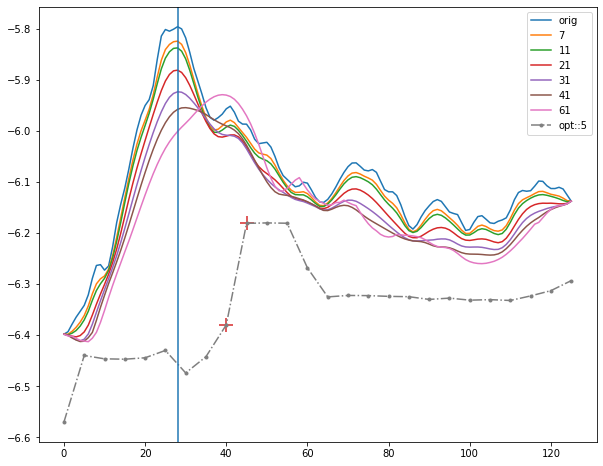

In [52]:
fig, ax = makefig()

for key, val in ener.items():
    ax.plot(val, label=key)
# ax.scatter(-4, ener_0, c="k", marker="+")
# ax.scatter(0, ener_1, c="tab:red", marker="+")

ax.plot(x_opt, ener_relax, marker=".", linestyle="-.", c="tab:gray", label="opt::5")

# index for change in the relaxed frames
relax_index = traj_processor.get_connectivity_change(frames_opt)[0]
ax.scatter(x_opt[relax_index], ener_relax[relax_index], marker="+", c="tab:red", s=200)


ax.axvline(28)

l = ax.legend()


In [41]:
traj_processor.get_connectivity_change(frames_opt)

[[8, 9]]

In [43]:
ase.io.write("relaxed_frames.xyz", frames_opt)

/home/tks32/programs/miniconda3/envs/quip_env/lib/python3.7/site-packages/ase/io/extxyz.py:843: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  'from calculator'.format(key))


array([40, 45])